## 1. Загрузка данных и начальная информация о датафреймах

In [1]:
import pandas as pd

# Загрузка данных
train_df = pd.read_csv('/Users/katerinakuhne/Documents/МАГА МФТИ/Python/Pandas/train.csv') 
# Смотрим на 5 первых строк
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [2]:
# Смотрим на 5 последних строк
train_df.tail()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True
101230331,101230331,428692118,2147482888,7995,0,26,3,1,29000.0,True


In [3]:
# Смотрим информацию о нашем df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [4]:
train_df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


## 2. Приведение данных к другим типам (чтобы уменьшить размер датафреймов) и удаление колонок, дублирующих данные. 

In [5]:
#df тяжелый, но тип данных всех числовых признаков uint64, чтобы он стал легче и с ним проще стало работать изменим тип данных для некоторых колонок 
#проверим какие значения принимает content_type_id (согласно описанию 0 и 1)
print(train_df['content_type_id'].unique())
#content_type_id принимает значения 0 и 1, uint64 явно для него избыточен
train_df['content_type_id'] = train_df['content_type_id'].astype('int8')
train_df.info()

[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int8   
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(7), int8(1), object(1)
memory usage: 6.9+ GB


In [6]:
#сделаем тоже с некоторыми другими колонками
print(train_df['user_answer'].unique())
train_df['user_answer'] = train_df['user_answer'].astype('int8')
print(train_df['answered_correctly'].unique())
train_df['answered_correctly'] = train_df['answered_correctly'].astype('int8')

[ 3  2  0  1 -1]
[ 1  0 -1]


In [7]:
#сделаем тоже с некоторыми другими колонками
print(train_df['task_container_id'].max())
train_df['task_container_id'] = train_df['task_container_id'].astype('int16')
print(train_df['row_id'].max())
train_df['row_id'] = train_df['row_id'].astype('int32')

9999
101230331


In [8]:
train_df['content_id'].max()
train_df['content_id'] = train_df['content_id'].astype('int16')

In [9]:
train_df['user_id'].max()
train_df['user_id'] = train_df['user_id'].astype('int32')

In [10]:
train_df['prior_question_elapsed_time'].max()
train_df['prior_question_elapsed_time'] = train_df['prior_question_elapsed_time'].astype('float32')

In [11]:
#размер df уменьшился более чем вдвое
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  object 
dtypes: float32(1), int16(2), int32(2), int64(1), int8(3), object(1)
memory usage: 3.3+ GB


In [12]:
# Загрузка данных
questions_df = pd.read_csv('/Users/katerinakuhne/Documents/МАГА МФТИ/Python/Pandas/questions.csv') 
# Смотрим на 5 первых строк
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [13]:
questions_df = questions_df.astype({'question_id': 'int16', 'bundle_id': 'int16', 'correct_answer': 'int8', 'part': 'int8'}) 
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB


In [14]:
questions_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [15]:
#На первый взгляд question_id дублирует bundle_id, но на поверку это оказывается не так:
all_match = (questions_df['question_id'] == questions_df['bundle_id']).all()
print(all_match)

#Тем не менее после некоторых манипуляций удается выяснить, что в bundle_id на 1402 строке происходит сбой нумерации, то есть на самом деле этот столбец дублирует question_id, просто он немного "поломанный"
print((questions_df['question_id'].iloc[0:1401]==questions_df['bundle_id'].iloc[0:1401]).all())

print(questions_df['question_id'].iloc[1400:1415])
print(questions_df['bundle_id'].iloc[1400:1415])

#Удалим "поломанный" столбец
questions_df.drop(columns=['bundle_id'], inplace=True)

False
True
1400    1400
1401    1401
1402    1402
1403    1403
1404    1404
1405    1405
1406    1406
1407    1407
1408    1408
1409    1409
1410    1410
1411    1411
1412    1412
1413    1413
1414    1414
Name: question_id, dtype: int16
1400    1400
1401    1400
1402    1400
1403    1403
1404    1403
1405    1403
1406    1406
1407    1406
1408    1406
1409    1409
1410    1409
1411    1409
1412    1412
1413    1412
1414    1412
Name: bundle_id, dtype: int16


In [16]:
# Загрузка данных
lectures_df = pd.read_csv('/Users/katerinakuhne/Documents/МАГА МФТИ/Python/Pandas/lectures.csv') 
# Смотрим на 5 первых строк
lectures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [17]:
lectures_df['part'].max()
lectures_df = lectures_df.astype({'lecture_id': 'int16', 'tag': 'int16', 'part': 'int8'}) 
lectures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int16 
 1   tag         418 non-null    int16 
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int16(2), int8(1), object(1)
memory usage: 5.4+ KB


## 3. Преобразование данных в некоторых колонках
Колонка tags в questions_df содержит наборы тегов (один или несколько тегов). Как мы проанализируем ниже, количество уникальных тегов - 188, а количество уникальных комбинаций тегов и того больше - 1519. Причем большинство комбинаций тегов встречаются меньше 50 раз. В таком случае имеет смысл выделить 20 подтипов, которые встречаются чаще всего, а остальные обозначить как 'other'. Также я решила создать колонку с 20 самыми популярными одиночными тегами (то есть из каждого набора я вытащила только один популярный, если такой там есть, а иначе заменила на other). 

In [18]:
unique_tags = questions_df['tags'].str.split().explode().nunique()
print(unique_tags)

188


In [39]:
all_tags = questions_df['tags'].str.split()

In [20]:
display(all_tags)

0         [51, 131, 162, 38]
1              [131, 36, 81]
2        [131, 101, 162, 92]
3        [131, 149, 162, 29]
4          [131, 5, 162, 38]
                ...         
13518                   [14]
13519                    [8]
13520                   [73]
13521                  [125]
13522                   [55]
Name: tags, Length: 13523, dtype: object

In [21]:
tag_counts = questions_df['tags'].str.split().explode().value_counts().nlargest(20)

In [22]:
def get_popular_tag(tags, tag_counts):
    if not isinstance(tags, list):
        return 'other'
    for tag in tags:
        if tag in tag_counts:  # Проверяем, есть ли тег среди популярных
            return tag  # Возвращаем первый найденный популярный тег
    return 'other'  # Если нет популярных тегов, возвращаем "other"

# Применяем функцию к Series
questions_df['popular_tags'] = all_tags.apply(lambda x: get_popular_tag(x, tag_counts))

# Выводим результат
questions_df.head()

,question_id,correct_answer,part,tags,popular_tags
0,0,0,1,51 131 162 38,131
1,1,1,1,131 36 81,131
2,2,0,1,131 101 162 92,131
3,3,0,1,131 149 162 29,131
4,4,3,1,131 5 162 38,131


In [23]:
print(questions_df['tags'].nunique())

1519


In [24]:
questions_df['tags'].value_counts().nlargest(20)

8            738
73           617
53           523
1            413
96           373
55           308
79           293
27           261
14           232
173          222
109          204
89           202
136 81 92    140
91           125
136 38 29    110
60           108
116           99
7             76
147           75
72            72
Name: tags, dtype: int64

In [25]:
popular_tags=questions_df['tags'].value_counts().nlargest(20).index
print(popular_tags)

Index(['8', '73', '53', '1', '96', '55', '79', '27', '14', '173', '109', '89',
       '136 81 92', '91', '136 38 29', '60', '116', '7', '147', '72'],
      dtype='object')


In [26]:
questions_tags=questions_df['tags']
questions_tags.head()

0     51 131 162 38
1         131 36 81
2    131 101 162 92
3    131 149 162 29
4      131 5 162 38
Name: tags, dtype: object

In [27]:
questions_df['popular_tags_combination'] = questions_tags.apply(lambda x: x if x in popular_tags else 'other')
display(questions_df['popular_tags_combination'])

0        other
1        other
2        other
3        other
4        other
         ...  
13518       14
13519        8
13520       73
13521    other
13522       55
Name: popular_tags_combination, Length: 13523, dtype: object

In [28]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   question_id               13523 non-null  int16 
 1   correct_answer            13523 non-null  int8  
 2   part                      13523 non-null  int8  
 3   tags                      13522 non-null  object
 4   popular_tags              13523 non-null  object
 5   popular_tags_combination  13523 non-null  object
dtypes: int16(1), int8(2), object(3)
memory usage: 369.9+ KB


## 4. Анализ пропусков
Выявим и обработаем пропуски.

In [29]:
#Проанализируем пропущенные значения: посчитаем их в каждом столбце и сколько их в процентном соотношении с остальными значениями
def analyze_nan(train_df):
    #Пропущенных значений по каждому столбцу
    nan_count = train_df.isna().sum()
    #Процент пропущенных значений
    nan_percentage = round((nan_count / len(train_df)) * 100, 2)
    nan_df = pd.DataFrame({
        'Столбцы': nan_count.index,
        'Количество строк c NaN': nan_count.values,
        '% NaN значений в столбце': nan_percentage.values
    })
    #Фильтрация только тех столбцов, где есть пропуски
    nan_df = nan_df[nan_df['Количество строк c NaN'] > 0].reset_index(drop=True)
    return nan_df

nan_data = analyze_nan(train_df)
nan_data

,Столбцы,Количество строк c NaN,% NaN значений в столбце
0,prior_question_elapsed_time,2351538,2.32
1,prior_question_had_explanation,392506,0.39


Заметим, NaN в prior_question_had_explanation и в prior_question_elapsed_time появляются тогда, когда timestamp=0, что логично, т.к. timestamp-время от первого взаимодействия пользователя с системой, prior_question_elapsed_time-время, которое пользователь потратил на предыдущий набор вопросов (не включая лекции), а prior_question_had_explanation-признак, указывающий, видел ли пользователь объяснение ответа после предыдущего набора вопросов. 

In [30]:
train_df.loc[(train_df['timestamp'] == 0) & (train_df['prior_question_elapsed_time'].isna())].shape[0]

392521

In [31]:
train_df.loc[(train_df['timestamp'] == 0) & (train_df['prior_question_had_explanation'].isna())].shape[0]

392441

Тогда для строк "первого взаимодействия пользователя с системой" заменим пропущенные значения в prior_question_elapsed_time на 0, а в prior_question_had_explanation на False

In [32]:
train_df.loc[(train_df['timestamp'] == 0) & (train_df['prior_question_elapsed_time'].isna()), 'prior_question_elapsed_time'] = 0

In [33]:
train_df.loc[(train_df['timestamp'] == 0) & (train_df['prior_question_had_explanation'].isna()), 'prior_question_had_explanation'] = False

In [34]:
train_df.isna().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       1959017
prior_question_had_explanation         65
dtype: int64

In [35]:
#Для подавляющего большинства оставшихся пропущенных значений prior_question_elapsed_time (время, которое пользователь потратил на предыдущий набор вопросов (не включая лекции)), предыдущей активностью пользователя была лекция. 
condition = train_df['prior_question_elapsed_time'].isna()
previous_rows = train_df[condition].shift(1)
print(previous_rows['content_type_id'].mean())

0.9999668200770182


In [36]:
questions_df.isna().sum()

question_id                 0
correct_answer              0
part                        0
tags                        1
popular_tags                0
popular_tags_combination    0
dtype: int64

In [37]:
lectures_df.isna().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

### Вывод: количество пропусков изначально мало, после преобразований незначительное (около 2% для одного признака и десятые процента для остальных). 
Мы также выяснили, что для подавляющего большинства оставшихся пропущенных значений prior_question_elapsed_time (время, которое пользователь потратил на предыдущий набор вопросов (не включая лекции)), предыдущей активностью пользователя была лекция. При необходимости их можно восполнить, заменив на время, которое пользователь потратил на предыдущий вопрос (до лекции). Или заполнить нулями. 

## 5. Распределение переменных
Проанализируем распределение каждой переменной, как числовой, так и категориальной.

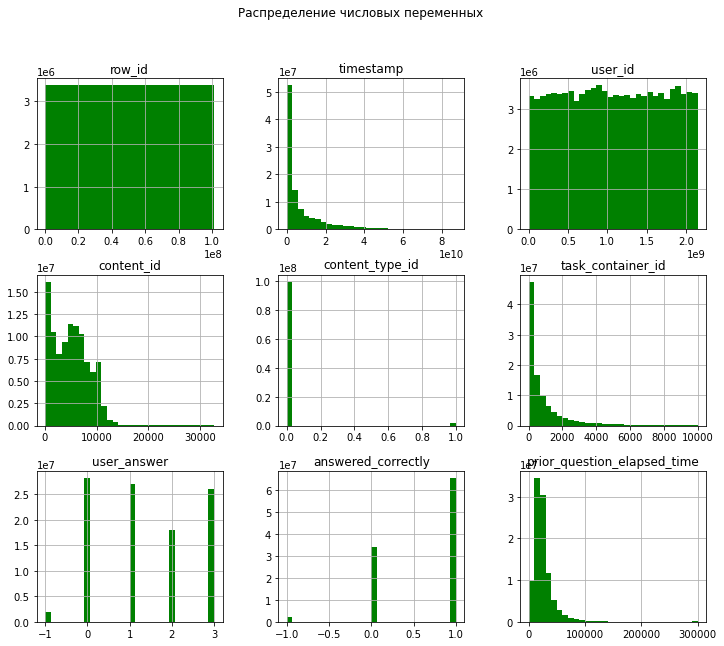

In [38]:
#Распределение числовых переменных train_df
import matplotlib.pyplot as plt

train_df.hist(bins=30, figsize=(12, 10), color='green')
plt.suptitle('Распределение числовых переменных')
plt.show()

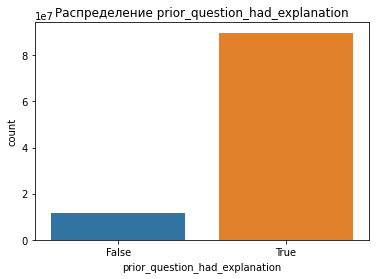

In [40]:
import seaborn as sns

# Распределение категориальных переменных
for column in ['prior_question_had_explanation']:
    sns.countplot(x=column, data=train_df)
    plt.title(f'Распределение {column}')
    plt.show()

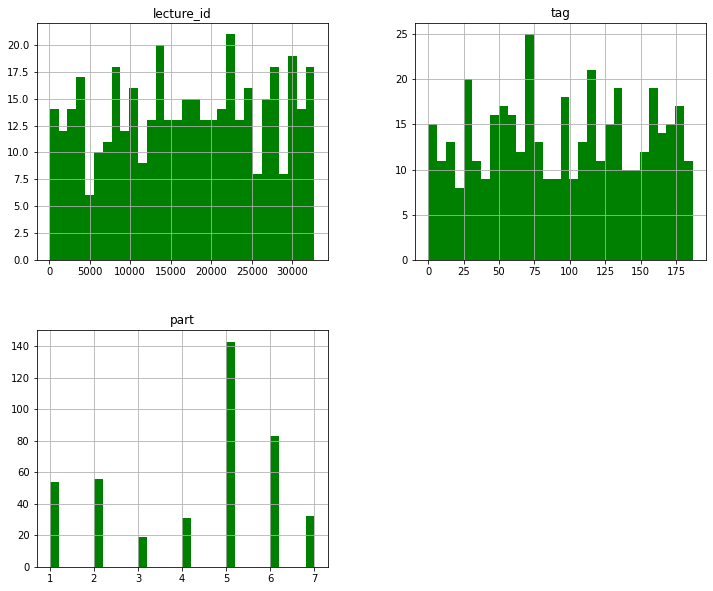

In [41]:
#Распределение числовых переменных lectures_df
lectures_df.hist(bins=30, figsize=(12, 10), color='green')
plt.show()

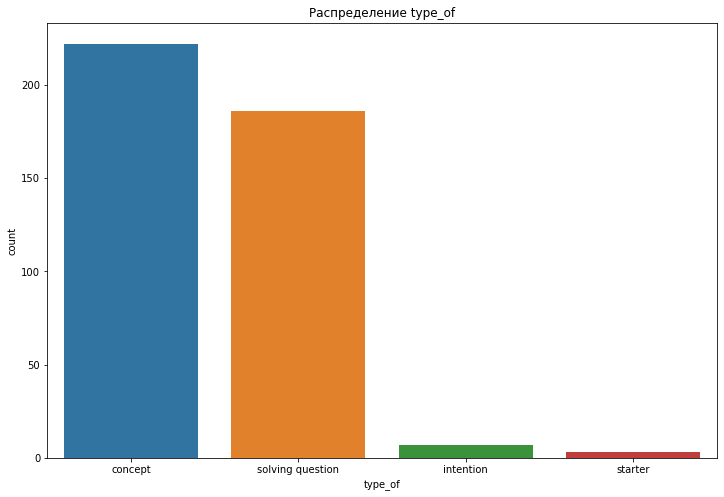

In [42]:
# Распределение категориальных переменных lectures_df
for column in ['type_of']:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=lectures_df)
    plt.title(f'Распределение {column}')
    plt.show()

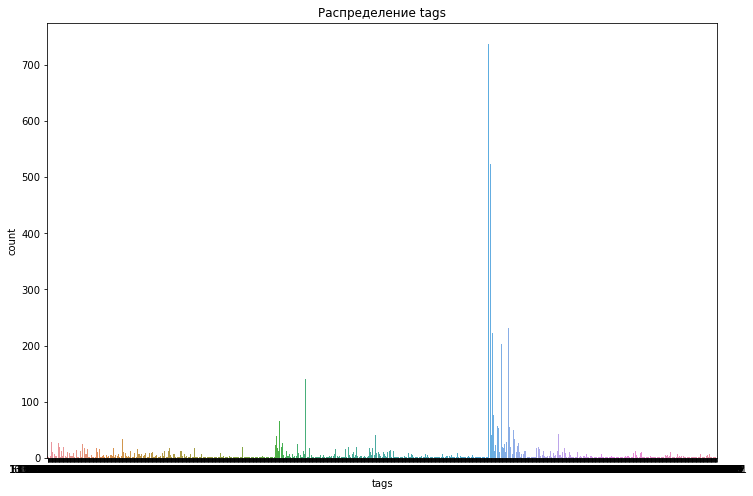

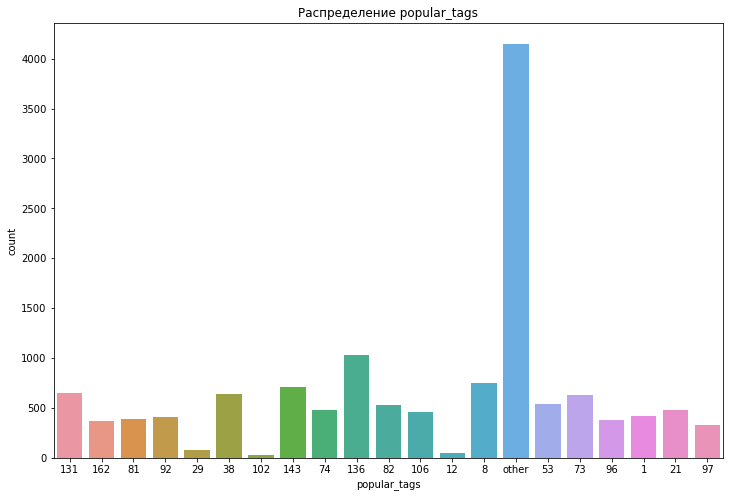

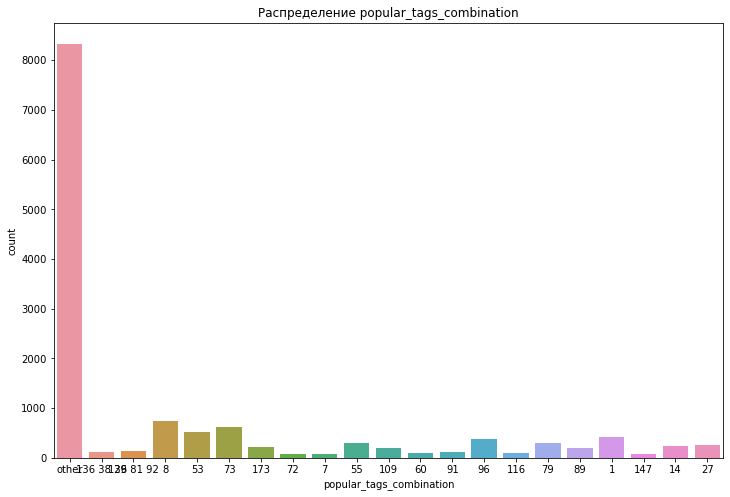

In [43]:
# Распределение категориальных переменных questions_df
for column in ['tags', 'popular_tags', 'popular_tags_combination']:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=questions_df)
    plt.title(f'Распределение {column}')
    plt.show()

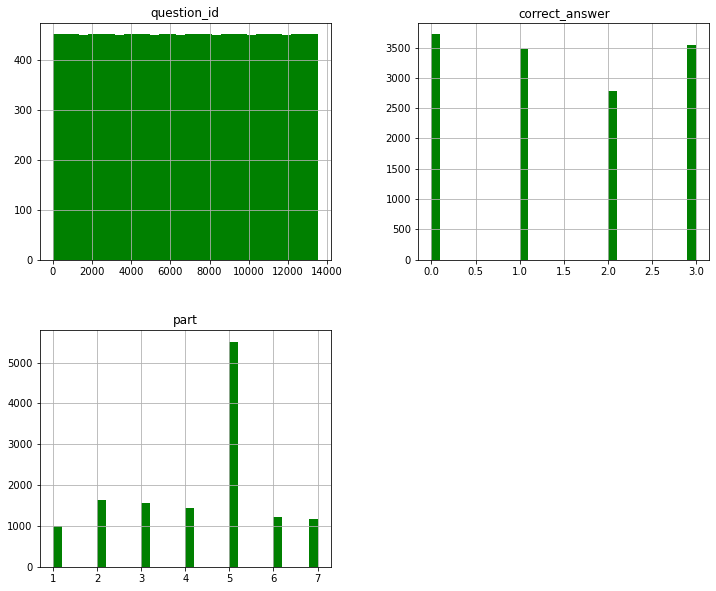

In [44]:
#Распределение числовых переменных questions_df
questions_df.hist(bins=30, figsize=(12, 10), color='green')
plt.show()

## 6. Взаимосвязь между признаками
Проанализируем взаимосвязь между признаками. 

Сгруппируем данные по типу контента и заметим, что каждый раз, когда пользователь смотрит лекцию, он получает -1 в любом случае, правильных или неправильных ответов для лекций нет. То есть -1 — это просто факт взаимодействия с контентом типа "лекция". Наша задача — предсказать, сможет ли ученик правильно ответить на следующий вопрос. То есть в случае с лекциями предсказывать нечего. Получается, что данные относящиеся к лекциям могут влиять на правильность ответа на вопрос только опосредованно (например, если студент смотрел лекцию по релевантной теме перед тем как отвечать на вопрос, он, возможно, с большей вероятностью ответит правильно и т.д.). Но для того, чтобы выявить такие влияния, необходимо переработать данные, хранящихся в lectures и данные о лекциях из основного датафрейма, создав из них новые признаки.

In [45]:
train_df.groupby('content_type_id')['answered_correctly'].mean()

content_type_id
0    0.657236
1   -1.000000
Name: answered_correctly, dtype: float64

Разобьем train_df на два датасета: один только с информацией, относящейся к вопросам, другой — только к лекциям, дополним их данными из lectures_df и questions_df, затем сольем все в один датафрейм. 

In [46]:
train_questions = train_df[train_df['content_type_id'] == 0]

In [83]:
train_lectures = train_df[train_df['content_type_id'] == 1]

In [48]:
train_questions = train_questions.merge(
    questions_df, how='left', left_on='content_id', right_on='question_id'
)

In [49]:
train_questions.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,correct_answer,part,tags,popular_tags,popular_tags_combination
0,0,0,115,5692,0,1,3,1,0.0,False,5692,3,5,151,other,other
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,2,5,168,other,other
2,2,118363,115,128,0,0,0,1,55000.0,False,128,0,1,131 149 92,131,other
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,0,1,131 104 81,131,other
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,1,1,131 149 92,131,other


In [50]:
train_questions.drop(columns=['question_id'], inplace=True)

In [51]:
train_lectures = train_lectures.merge(
    lectures_df, how='left', left_on='content_id', right_on='lecture_id'
)
train_lectures.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,part,type_of
0,89,653762,2746,6808,1,14,-1,-1,NaN,False,6808,129,2,intention
1,117,10183847,5382,16736,1,21,-1,-1,NaN,False,16736,40,1,concept
2,212,1424348597,5382,30207,1,104,-1,-1,NaN,False,30207,43,5,concept
3,216,1425557777,5382,18545,1,121,-1,-1,NaN,False,18545,58,5,concept
4,295,405813029,8623,10540,1,59,-1,-1,NaN,False,10540,99,1,concept


In [52]:
train_lectures.drop(columns=['lecture_id'], inplace=True)

In [ ]:
train_combined = pd.concat([train_questions, train_lectures])

In [ ]:
train_combined = train_combined.sort_values(by='row_id').reset_index(drop=True)

## 6.1 Взаимосвязь между целевой переменной и категориальными признаками

Чтобы проследить взаимосвязь между целевой переменной и категориальными признаками (колонками с тегами), посчитаем среднее количество правильных ответов для каждой колонки и построим столбчатые диаграммы.

In [56]:
mean_original_tags = train_questions.groupby('tags')['answered_correctly'].mean()
print(mean_original_tags)

tags
1                       0.607333
1 162                   0.622810
10 111 92               0.837507
10 164 102              0.761476
10 164 162 29           0.879346
                          ...   
98 97 21                0.720814
98 97 35 117 122 162    0.718192
98 97 35 146 122        0.716996
98 97 46 135            0.684939
98 97 77 135 162        0.888320
Name: answered_correctly, Length: 1519, dtype: float64


In [54]:
mean_popular_single = train_questions.groupby('popular_tags')['answered_correctly'].mean()
print(mean_popular_single)

popular_tags
1        0.608267
102      0.643194
106      0.724462
12       0.552019
131      0.795584
136      0.635882
143      0.712980
162      0.720992
21       0.627655
29       0.669363
38       0.695630
53       0.642843
73       0.591910
74       0.689093
8        0.628112
81       0.681004
82       0.699496
92       0.657483
96       0.620850
97       0.660286
other    0.621905
Name: answered_correctly, dtype: float64


In [55]:
mean_popular_comb = train_questions.groupby('popular_tags_combination')['answered_correctly'].mean()
print(mean_popular_comb)

popular_tags_combination
1            0.607333
109          0.707877
116          0.685136
136 38 29    0.760690
136 81 92    0.718833
14           0.699131
147          0.708984
173          0.662791
27           0.666135
53           0.633360
55           0.629942
60           0.638514
7            0.620366
72           0.631176
73           0.586561
79           0.629598
8            0.619862
89           0.623020
91           0.618635
96           0.612057
other        0.664494
Name: answered_correctly, dtype: float64


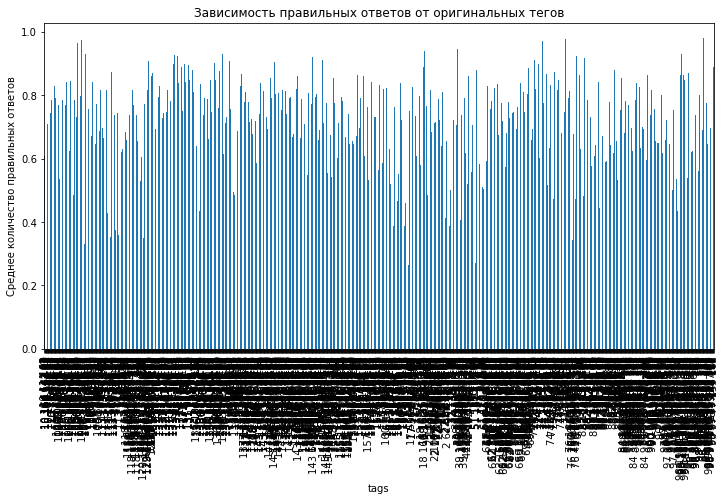

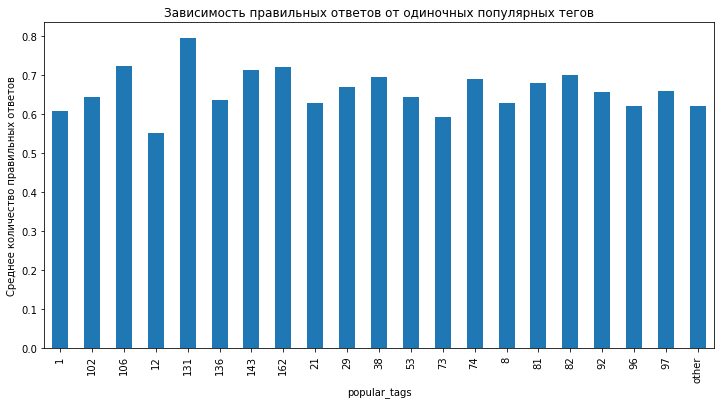

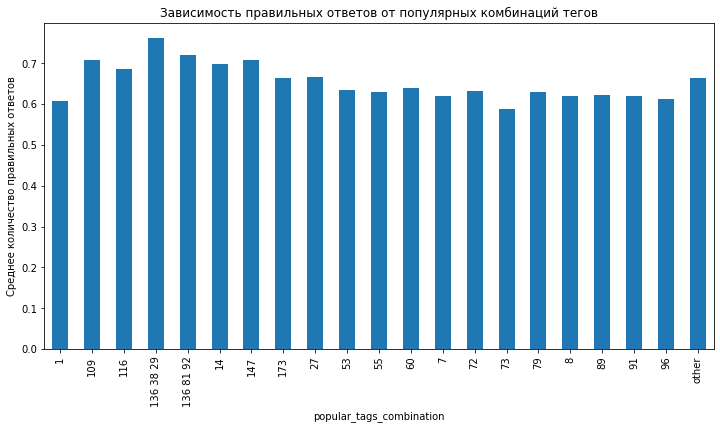

In [57]:
mean_original_tags.plot(kind='bar', figsize=(12, 6))
plt.title('Зависимость правильных ответов от оригинальных тегов')
plt.ylabel('Среднее количество правильных ответов')
plt.show()

mean_popular_single.plot(kind='bar', figsize=(12, 6))
plt.title('Зависимость правильных ответов от одиночных популярных тегов')
plt.ylabel('Среднее количество правильных ответов')
plt.show()

mean_popular_comb.plot(kind='bar', figsize=(12, 6))
plt.title('Зависимость правильных ответов от популярных комбинаций тегов')
plt.ylabel('Среднее количество правильных ответов')
plt.show()

**Можно сделать вывод, что между одиночными популярными тегами и целевой переменной зависимость чуть более выраженная, чем между популярными группами тегов и целевой переменной.** 

# Чтобы понять, как остальные (численные) признаки связаны между собой, построим корреляционную матрицу. 

In [58]:
#Превратим категориальный признак prior_question_had_explanation в числовой, принимающий значения 1 или 0
train_questions['prior_question_had_explanation'] = train_questions['prior_question_had_explanation'].replace({False: 0, True: 1})

In [59]:
train_questions['prior_question_had_explanation'] = train_questions['prior_question_had_explanation'].fillna(value=0)
train_questions['prior_question_had_explanation'].isna().sum()

0

In [60]:
#Удалим row_id, который просто нумерует строки 
train_questions.drop(columns=['row_id'], inplace=True)

In [61]:
#И content_type_id, который в нашем датафрейме всегда равен 0, поскольку мы оставили только строчки с вопросами 
train_questions.drop(columns=['content_type_id'], inplace=True)

In [62]:
train_questions['prior_question_had_explanation'] = train_questions['prior_question_had_explanation'].astype('int8')

In [63]:
train_questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99271300 entries, 0 to 99271299
Data columns (total 13 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   task_container_id               int16  
 4   user_answer                     int8   
 5   answered_correctly              int8   
 6   prior_question_elapsed_time     float32
 7   prior_question_had_explanation  int8   
 8   correct_answer                  int8   
 9   part                            int8   
 10  tags                            object 
 11  popular_tags                    object 
 12  popular_tags_combination        object 
dtypes: float32(1), int16(2), int32(1), int64(1), int8(5), object(3)
memory usage: 5.3+ GB


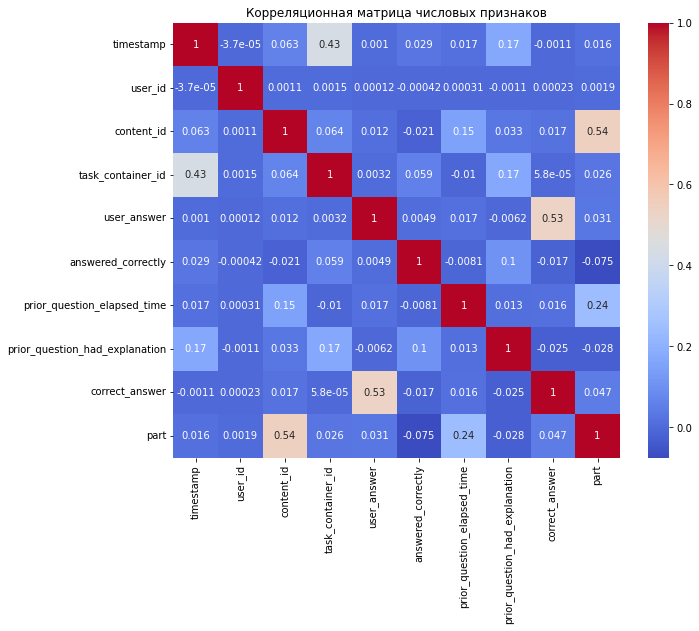

In [64]:
numeric_cols = train_questions.select_dtypes(include=['int64', 'int32', 'int16', 'int8', 'float32'])

# Корреляционная матрица для числовых признаков
corr_matrix = numeric_cols.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

**Выводы по матрице корреляции**:

1. answered_correctly:

- Наблюдается очень слабая корреляция между переменной answered_correctly и prior_question_had_explanation (0.1), что означает, что пользователи, которые получали объяснения в предыдущем вопросе чуть чаще отвечали правильно на следующий.
- Остальные переменные имеют незначительную корреляцию с переменной answered_correctly, что говорит о том, что они не влияют на вероятность ответить на вопрос правильно.

2. timestamp:

- Умеренно сильная корреляция с task_container_id (0.43), что говорит о том, что вопросы поступают в определенном порядке, поэтому времемя взаимодействия пользователя с системой и номер контейнера взаимосвязаны.
- Очень слабая корреляция с prior_question_had_explanation (0.17), что, возможно, означает, что на чтение объяснений тратится дополнительное время.
- Незначительная корреляция с другими переменными.

3. content_id:

- Умеренно сильная корреляция с part (0.54), что говорит о том, что, возможно, разные разделы контента разбиты на разные части, поэтому если вопрос из определенного раздела контента, то и вероятность, что номера частей совпадут достаточно высокая.  
- Незначительная корреляция с другими переменными.

4. task_container_id:

- Как уже упоминалось, умеренно сильная корреляция с timestamp.
- Незначительная корреляция с другими переменными.

5. user_answer:

- Умеренно сильная корреляция с correct_answer (0.53), что логично, так как обе переменные принимают одни и те же четыре значения (0, 1, 2, 3).  
- Незначительная корреляция с другими переменными.

6. prior_question_elapsed_time:

- Слабая корреляция с part (0.24), что, видимо, объясняется тем, что время в миллисекундах, которое пользователь потратил на предыдущий набор вопросов, может быть больше или меньше в зависимости от части к которой относится вопрос, а части следуют в определенном порядке.   
- Незначительная корреляция с другими переменными.

7. prior_question_had_explanation:

- Как уже упоминалось, очень слабая корреляция с timestamp, task_container_id и answered_correctly.
- Незначительная корреляция с другими переменными.

8. correct_answer:

- Как уже упоминалось, умеренно сильная корреляция с user_answer.
- Незначительная корреляция с другими переменными.

9. part:

- Как уже упоминалось, умеренно сильная корреляция с content_id и слабая корреляция с prior_question_elapsed_time.
- Незначительная корреляция с другими переменными.

### Проверим признаки на мультиколлинеарность, посчитав коэффициенты инфляции дисперсии.

In [65]:
#Избавимся от оставшихся пропусков
train_questions.isna().sum()

timestamp                          0
user_id                            0
content_id                         0
task_container_id                  0
user_answer                        0
answered_correctly                 0
prior_question_elapsed_time       65
prior_question_had_explanation     0
correct_answer                     0
part                               0
tags                               1
popular_tags                       0
popular_tags_combination           0
dtype: int64

In [66]:
#Пропусков очень мало, заменим их на 0
train_questions['prior_question_elapsed_time'] = train_questions['prior_question_elapsed_time'].fillna(value=0)

In [82]:
train_questions.isna().sum()

timestamp                         0
user_id                           0
content_id                        0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_elapsed_time       0
prior_question_had_explanation    0
correct_answer                    0
part                              0
tags                              1
popular_tags                      0
popular_tags_combination          0
dtype: int64

Датафрейм слишком большой и при расчетах VIF умирает ядро, поэтому проверим мультиколлинеарность на случайной подвыборке данных.

In [78]:
#Выбираем случайные 10000000 строк для расчета VIF (чуть больше 10%)
train_questions_sample = train_questions.sample(n=10000000, random_state=42)

In [79]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Выбор только числовых признаков, исключая answered_correctly (целевую переменную)
numeric_cols = train_questions_sample.select_dtypes(include=['int64', 'int32', 'int16', 'int8', 'float32']).drop(columns=['answered_correctly'])

In [80]:
# Добавляем константу для вычисления VIF и рассчитываем VIF для каждого признака
X = sm.add_constant(numeric_cols)

vif_data = pd.DataFrame()
vif_data["Признак"] = X.columns

In [81]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

/Users/katerinakuhne/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Признак,VIF
0,const,0.000000
1,timestamp,1.249617
2,user_id,1.000007
3,content_id,1.430394
4,task_container_id,1.251473
5,user_answer,1.397252
6,prior_question_elapsed_time,1.063837
7,prior_question_had_explanation,1.046918
8,correct_answer,1.399687
9,part,1.482074


**Вывод по значениям VIF**:
VIF для всех признаков находится значительно ниже критического значения 5, что говорит о том, что мультиколлинеарность между признаками отсутствует или минимальна.

**Общие выводы**:
1. По результатам корреляционной матрицы и анализа VIF можно сделать вывод, что признаков с высокой мультиколлинеарностью нет, а переменные имеют слабую корреляцию между собой.
2. Признаки, такие как `prior_question_had_explanation` и `popular_tags`, могут оказаться важными для построения модели, так как они демонстрируют умеренные взаимосвязи с целевой переменной `answered_correctly`. 
3. Возможно, было бы полезно превратить признаки `popular_tags` и `popular_tags_combination` в числовые, чтобы было удобнее исследовать их взаимосвязи с целевой переменной и, в результате, выбрать один из них. 
4. Возможно, необходимо дополнительное исследование данных о лекциях, с целью создать новый признак/признаки и понять влияют ли они на целевую переменную. Например, признак, демонстрирующий смотрел ли пользователь лекцию по релевантной теме перед ответами на вопросы. Тем не менее, из-за того что лекций мало относительно вопросов и их смотрят только некоторые пользователи, польза такого признака может оказаться невелика. 